# Исследования рынка общепита в Москве для принятия решения об открытии нового заведения

## Введение

Для открытия нового кафе не достаточно оригинальной идеи.
<br> Мы решили отрыть кафе, где официанты - роботы. Но, в данном случае, нас заботит не только возможное ускорение востания машин, но и общее положение дел на рынке общественного питания. Поэтому, мы решили иследовать рынок города Москва.

## Предобработка данных

Дя начала изучим и обработаем имеющиеся данные для дальнейшего анализа.

In [ ]:
#Импорт библиотек и настроек
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format
import seaborn as sns
import plotly.express as px 
from plotly import graph_objects as go
from io import BytesIO
import requests

import plotly.io as pio
pio.renderers.default = "png"


In [ ]:
df = pd.read_csv('/datasets/rest_data.csv')

In [ ]:
#просмотр информации о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


В таблице мы видим следующие столбцы:
<br>`id` — идентификатор объекта;
<br>`object_name` — название объекта общественного питания;
<br>`chain` — сетевой ресторан;
<br>`object_type` — тип объекта общественного питания;
<br>`address` — адрес;
<br>`number` — количество посадочных мест.

In [ ]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [ ]:
#замена в некоторых столбцах Ё на Е и приведение к нижнему регистру
df['object_name'] = df['object_name'].str.replace('ё','е')
df['address'] = df['address'].str.replace('ё','е')
df['object_name'] = df['object_name'].str.lower()
df['address'] = df['address'].str.lower()

In [ ]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50


Проверим обработанные данные на явные дубликаты:

In [ ]:
df.duplicated().sum()

0

Дубликатов нет.
<br>Проверим количество дубликатов по столбцам: `object_name`, `address`,`chain`,`object_type`,`number`.

In [ ]:
df.duplicated(subset=['object_name', 'address','chain','object_type','number']).sum()

85

Мы получили 85 дубликатов. Избавимся от них.

In [ ]:
df = df.drop_duplicates(subset=['object_name', 'address', 'chain', 'object_type', 'number'])

Посмотрим столбец `chain`.

In [ ]:
df['chain'].unique()

array(['нет', 'да'], dtype=object)

В столбце `chain` только два уникальных значения. Заменим их на *True* и *False*, а так же поменяем тип данных на `bool`.

In [ ]:
#замена на True и False
df['chain'] = df['chain'].map({'да': True, 'нет':False})
#изменение типа данных
df['chain'] = df['chain'].astype('bool')
df['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

Так же мы проверили уникальные значени столбца `object_type`. Повторений типов объектов общественного питания нет. <br>Проверим есть ли точки с нулевым значением посадочных мест.

In [ ]:
zero_number = df[df['number'] == 0]
zero_number

,id,object_name,chain,object_type,address,number
137,115498,пекарня & донер,False,закусочная,"город москва, бутырская улица, дом 9, корпус 2",0
154,152556,шаурма в пите,False,предприятие быстрого обслуживания,"город москва, варшавское шоссе, дом 72, корпус 2",0
157,149568,суши,False,предприятие быстрого обслуживания,"город москва, улица маршала василевского, дом ...",0
190,126956,"шаурма, куры-гриль",False,предприятие быстрого обслуживания,"город москва, 1-я владимирская улица, дом 21",0
195,149531,"шаурма, куры-гриль",False,предприятие быстрого обслуживания,"город москва, 2-я владимирская улица, дом 44/10",0
...,...,...,...,...,...,...
15334,211228,милти,True,магазин (отдел кулинарии),"город москва, дубравная улица, дом 34/29",0
15335,211221,милти,True,магазин (отдел кулинарии),"город москва, пятницкое шоссе, дом 3",0
15336,211209,готовые блюда милти,True,предприятие быстрого обслуживания,"город москва, ореховый бульвар, дом 22а",0
15337,208477,милти,True,предприятие быстрого обслуживания,"город москва, 3-й крутицкий переулок, дом 18",0


Точек с нулевым количеством посадочных мест - 1588. Мы решили их не удалять т.к. это такие же точки питания, только работающие на вынос.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15281 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15281 non-null  int64 
 1   object_name  15281 non-null  object
 2   chain        15281 non-null  bool  
 3   object_type  15281 non-null  object
 4   address      15281 non-null  object
 5   number       15281 non-null  int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 731.2+ KB


Мы провели обработку имеющихся данных, удалили необходимые дубликаты, поменяли тип данных.

## Анализ данных

Проведем анализ подготовленных данных.

### Cоотношение видов объектов общественного питания по количеству

Найдем какое количество объектов общественного питания у каждого типа.

In [ ]:
#находим количество точек общественного питания по типу
object_type = df['object_type'].value_counts().to_frame().reset_index()
object_type.columns = ['object_type', 'count']
object_type

,object_type,count
0,кафе,6071
1,столовая,2584
2,ресторан,2282
3,предприятие быстрого обслуживания,1897
4,бар,855
5,буфет,576
6,кафетерий,395
7,закусочная,348
8,магазин (отдел кулинарии),273


Мы получили таблицу отсортированную по количеству точек для каждого типа объекта общественного питания.
<br> Построим диаграмму,на ней будет наиболее удобно отображено распределение.

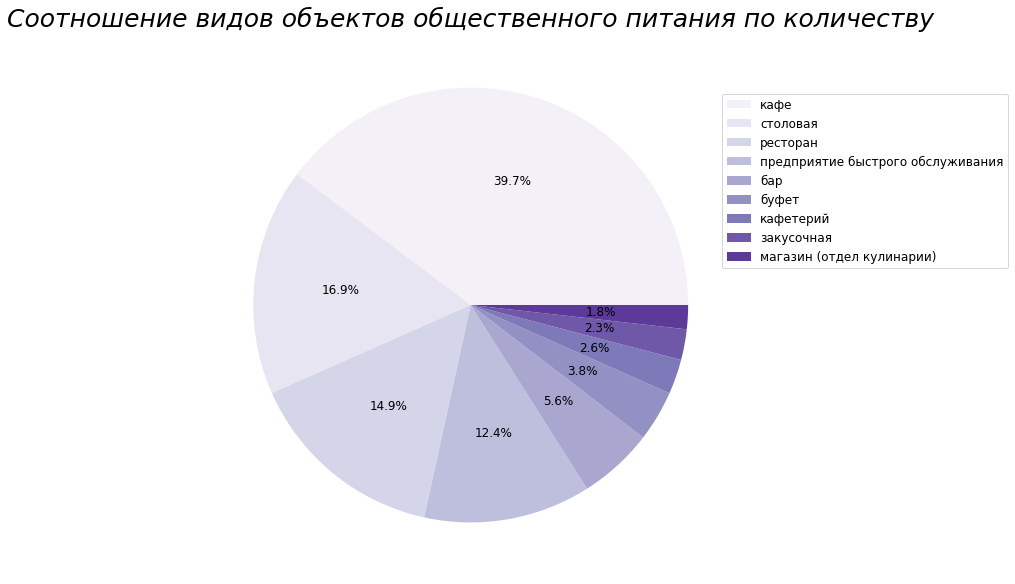

In [ ]:
#сохраняем цветовую схему
colors = sns.color_palette('Purples', 10) 

# Рендеринг круговой диаграммы
plt.figure(figsize=(10,10))
plt.pie(object_type['count'], colors = colors, autopct='%.1f%%', textprops={'fontsize': 12})
plt.title('Cоотношение видов объектов общественного питания по количеству',
                fontstyle = 'oblique',
                fontsize = 25)
plt.legend(labels=object_type['object_type'], bbox_to_anchor=(1.5, 0.9), prop={'size': 12})
plt.show()


Итак, по имеющимся данным самым часто встречаемым на улицах Москвы видом общественного питания, с большим отрывом, оказывается **Кафе** - 39,7%. На втором месте **Столовая** - 16,9%, а на третьем, **Ресторан** - 14,9%. Самым редким является **Магазин(отдел кулинарии)**, всего 1,8%

### Соотношение сетевых и несетевых заведений по количеству

Посмотрим соотношение сетевых и не сетевых заведений.
<br> Посчитаем их количество:

In [ ]:
#создание таблицы с количество сетевых и не сетевых заведений
chain = df['chain'].value_counts().to_frame().reset_index()
chain.columns = ['chain', 'count']
chain

,chain,count
0,False,12317
1,True,2964


Не сетевых заведений значительно больше, построим гистограмму для наглядности:

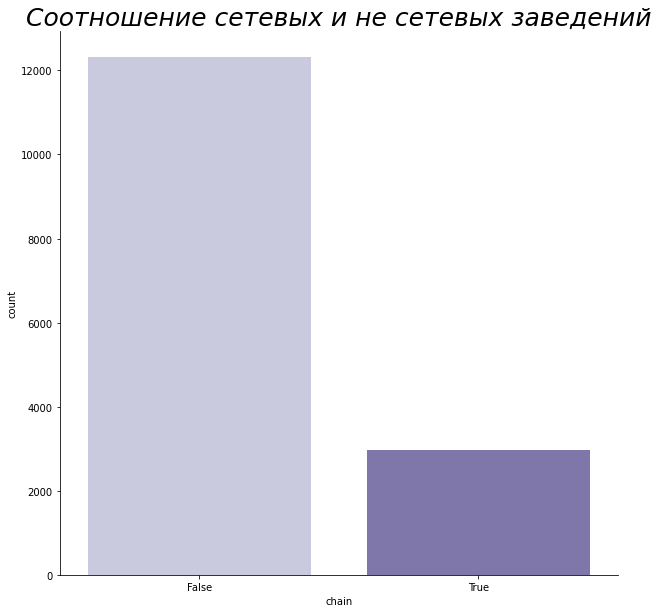

In [ ]:

plt.figure(figsize=(10,10))
ax = sns.barplot(x = 'chain', y = 'count', data = chain, palette='Purples')
sns.despine() 
plt.title('Cоотношение сетевых и не сетевых заведений',
                fontstyle = 'oblique',
                fontsize = 25)

plt.show()

На графике видно как мало заведений приходится на сетевые, всего около 20% от общего количества.

### Виды объекта общественного питания, для которых характерно сетевое распространение

Расмотрим более пожробно сетевые заведения, а именно найдем в коком виде общественного питания больше всего сетевых заведений.

In [ ]:
#выделяем сетевые заведения и создадим для этого отдельный датафрейм
chain_true_object = df[df['chain'] == True]
#расчет количества сетевых заведений по каждому виду
chain_true_object = chain_true_object['object_type'].value_counts().to_frame().reset_index()
chain_true_object.columns = ['object_type', 'count']

#объединение полученной таблицы с табл по общему количеству заведений распределенному по типу объекта общественного питания
chain_object = object_type.merge(chain_true_object, on='object_type')
chain_object.columns = ['object_type', 'count_all', 'count_chain_true']

#добавление столбца с процентом сетевых заведений от общего количества заведений
chain_object['per'] = round(chain_object['count_chain_true']/chain_object['count_all'] * 100,2)
#сортировка и вывод таблицы
chain_object = chain_object.sort_values('per',  ascending=False)
chain_object

,object_type,count_all,count_chain_true,per
3,предприятие быстрого обслуживания,1897,788,41.54
8,магазин (отдел кулинарии),273,78,28.57
2,ресторан,2282,543,23.79
0,кафе,6071,1396,22.99
7,закусочная,348,56,16.09
6,кафетерий,395,52,13.16
4,бар,855,37,4.33
5,буфет,576,11,1.91
1,столовая,2584,3,0.12


Построим гистограмму:

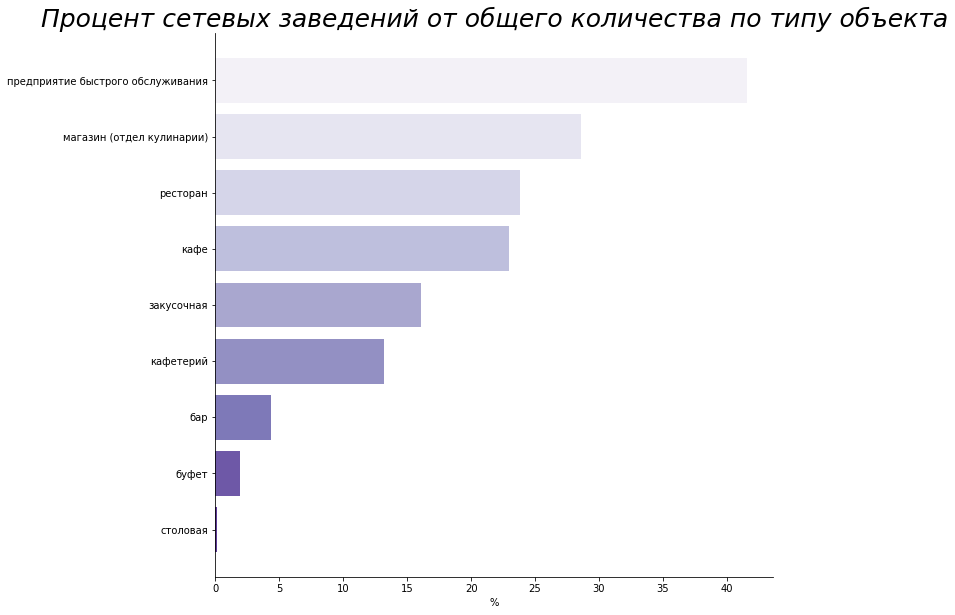

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Процент сетевых заведений от общего количества по типу объекта',
                fontstyle = 'oblique',
                fontsize = 25)
plt.barh(chain_object['object_type'], chain_object['per'],color = colors)

sns.despine() 
plt.xlabel('%')
plt.xticks(wrap=True)
plt.gca().invert_yaxis()
plt.show()

Сетевое распространение, более других, характерно для  **предприятий быстрого обслуживания**. Более 40% заведений являются сетевыми.
<br>На втором месте **магазины(отдел кулинарии)** - около 30%, на третьем месте **рестораны**, около 24%, от них всего на процент отстали **кафе**.
<br>А вот для **столовых** сетевое распространение совсем не характерно, их всего 0,1%.

### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

Продолжим рассматривать сетевые заведения.
<br> Рассмотрим число посадочных мест характерных для сетевых заведений.

In [ ]:
chain_true_object = df[df['chain'] == True]
#выведем основную статистическую информацию по числу посадочных мест в сетевых заведениях.
chain_true_object['number'].describe()

count   2,964.00
mean       52.98
std        57.15
min         0.00
25%        15.00
50%        40.00
75%        72.00
max       580.00
Name: number, dtype: float64

Мы видим, что есть заведения в которых совсем *нет посадочных мест*, так же есть заведение, в котором *посадочных мест 580*. В *среднем* посадочных мест в сетевых заведениях *53*, а *медианное* значение равно *40*.
<br> Построим гистограмму и проверим какие значения количества мест преобладают по частоте встречаемых сетевых заведений.

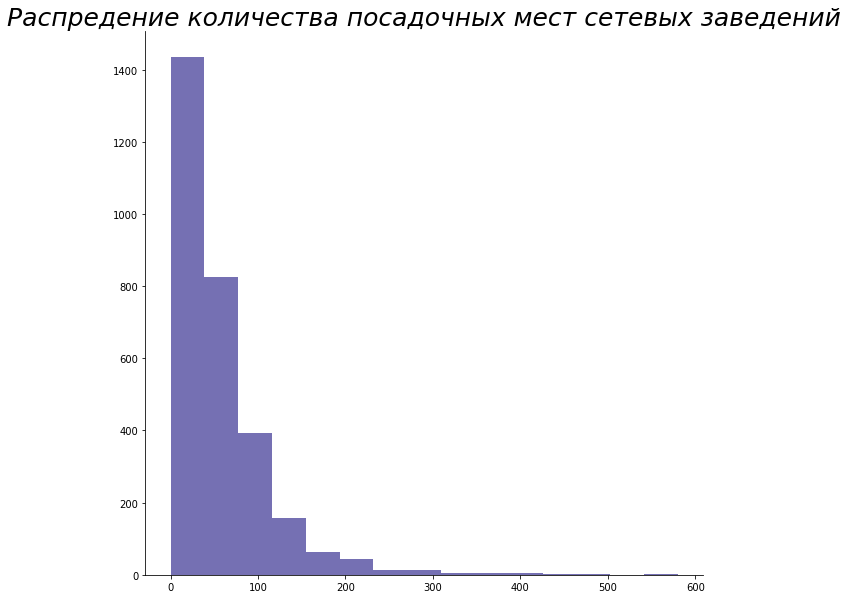

In [ ]:
plt.figure(figsize=(10,10))
chain_true_object['number'].hist(bins=15, color='#7570b3')
sns.despine() 
plt.title('Распредение количества посадочных мест сетевых заведений',
                fontstyle = 'oblique',
                fontsize = 25)
plt.grid()
plt.show()

Больше всего заведений приходится на количество до 40 посадочных мест, далее, чем больше количество посадочных мест. тем меньше количество заведений.
Исходя из увиденного можно сделать вывод, что **для сетевых заведений характерное количество мест в заведение до 40**.

In [ ]:
chain_in_1 = chain_true_object.groupby(
    'object_name').agg({'number':['mean', 'count']}).reset_index()
chain_in_1.columns = ['object_type', 'mean', 'count']
chain_in_1 = chain_in_1[chain_in_1['count'] != 1]
chain_in_1['group_mean'] = pd.cut(chain_in_1['mean'], bins = 3, 
                      labels=["Мало мест", "Средне мест", "Много мест"],right=True)
chain_in_1['group_count'] = pd.cut(chain_in_1['count'], bins = 3, 
                      labels=["Мало заведений", "Средне заведений", "Много заведений"],right=True)

chain_in_1['object_category'] = chain_in_1['group_mean'].astype(str) + " - " + chain_in_1['group_count'].astype(str)

chain_in_1_count = chain_in_1.groupby(
    'object_category').agg({'object_category':['count']}).reset_index()
chain_in_1_count.columns = ['object_category', 'count']
chain_in_1_count = chain_in_1_count.sort_values(by='count', ascending=False)
chain_in_1_count

,object_category,count
0,Мало мест - Мало заведений,177
4,Средне мест - Мало заведений,51
3,Много мест - Мало заведений,8
2,Мало мест - Средне заведений,5
1,Мало мест - Много заведений,3
5,Средне мест - Много заведений,1


Для сетевых заведений заведений характерно **малое количество мест и малое количество заведений** в сети.

### Среднее количество посадочных мест для каждого вида объекта общественного питания. Какой с самым большым средним количество посадочных мест

Построим таблицу с основной статистической информацией о количестве посадочных мест по типу объекта общественного питания.

In [ ]:
#вывод статистической информации
df.groupby('object_type')['number'].describe()

,count,mean,std,min,25%,50%,75%,max
object_type,,,,,,,,
бар,855.00,43.53,67.11,0.00,20.00,35.00,50.00,"1,700.00"
буфет,576.00,51.43,56.51,0.00,15.00,32.00,80.00,320.00
закусочная,348.00,7.85,16.88,0.00,0.00,0.00,10.00,216.00
кафе,"6,071.00",39.79,37.75,0.00,15.00,30.00,50.00,533.00
кафетерий,395.00,9.18,14.68,0.00,0.00,6.00,12.00,200.00
магазин (отдел кулинарии),273.00,5.59,9.87,0.00,0.00,0.00,8.00,50.00
предприятие быстрого обслуживания,"1,897.00",20.81,38.56,0.00,0.00,6.00,25.00,580.00
ресторан,"2,282.00",96.88,94.78,0.00,46.00,80.00,114.00,"1,500.00"
столовая,"2,584.00",130.34,95.19,0.00,51.50,103.00,200.00,"1,400.00"


Для большей наглядности построим "*ящик с усами*".

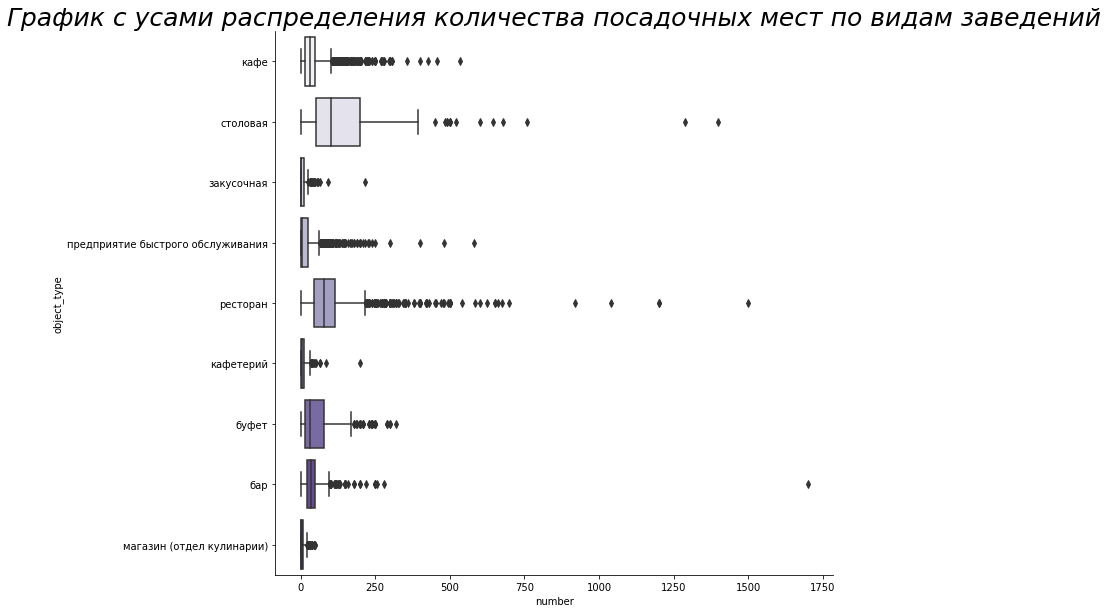

In [ ]:
#построение ящика с усами
plt.figure(figsize=(10,10))
sns.boxplot(data=df, x='number', y='object_type', palette='Purples',)
sns.despine() 
plt.title('График с усами распределения количества посадочных мест по видам заведений',
                fontstyle = 'oblique',
                fontsize = 25)
#plt.ylim(0, 2)
plt.show()

Для таких типов общественного питания как **магазин** или **закусочная** такой масштаб графика не очень нагляден. <br>Увеличим масштаб:

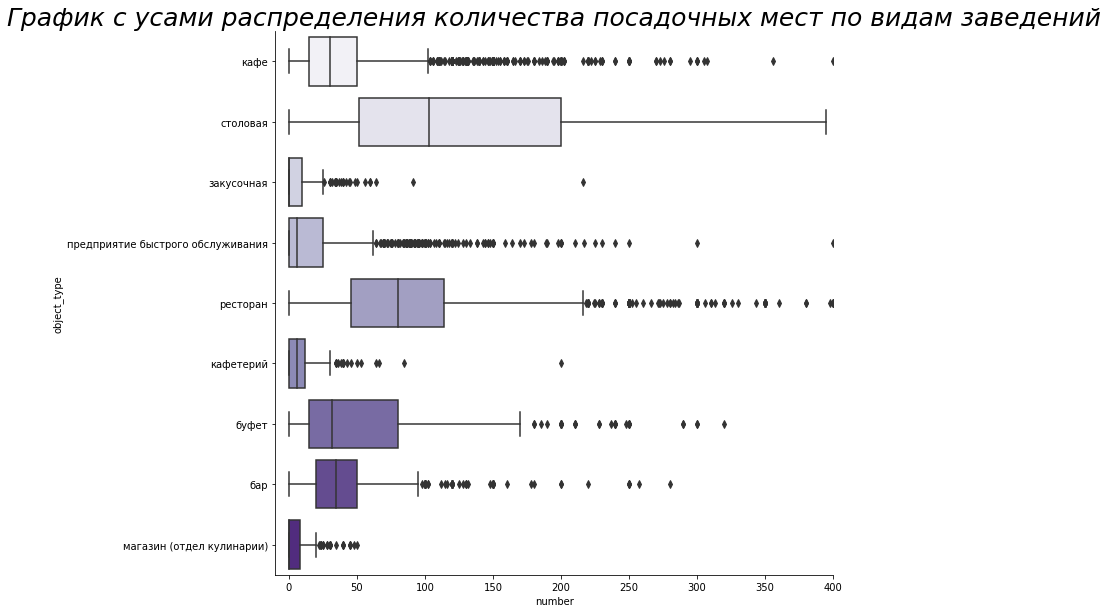

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df, x='number', y='object_type', palette='Purples',)
sns.despine() 
plt.title('График с усами распределения количества посадочных мест по видам заведений',
                fontstyle = 'oblique',
                fontsize = 25)
plt.xlim(-10, 400)
plt.show()

- Для **кафе** среднее значение составляет 40 посадочных мест, а медианное значение равно 30. У данного типа умеются значительные выбросы, а максимальное значение достигает 533.
- Среднее количество посадочных мест в **столовых** равно 130, а медианное значение равно 103, максимальное количество посадочных мест достигает 1400.
- В **закусочных** среднее значение посадочных мест равно 8, а медиана равняется 0, максимальное количество посадочных мест достингает 216.
- 21 место в среднем у **предприятий быстрого обслуживания**, тогда как медианное значение равно 6. Максимальная цифра равняется 580. Данный тип имеет большое количество аномальных значений.
- У типа **ресторан** среднее значение для посадочных мест равно 97, медиана равна 80, а максимальное количество посадочных мест достигает аж 1500. Имеется довольно много выбросов.
- В **кафетериях** среднее количество посдочных мест равно 9, а медианное значение рано 6. Имееются выбросы. Максимальное количетсво посадочных мест равно 200.
- В **буфетах**  среднее количество посдочных мест равно 52, медианное значение рано 32. Максимальное количество посадочных мест равно 320. 
- Для **баров** среднее количество посадочных мест равняется 44,  амедианное значение равно 35, так же максимально значение равно 1700, что является самым большим среди всех типов заведений.
- Среднее количество посадочных мест в **магазинах(отдел кулинарии)** равно 6, а медианное как и у *закусочных* - 0. Максимальное колчество посадочных мест равно 50.

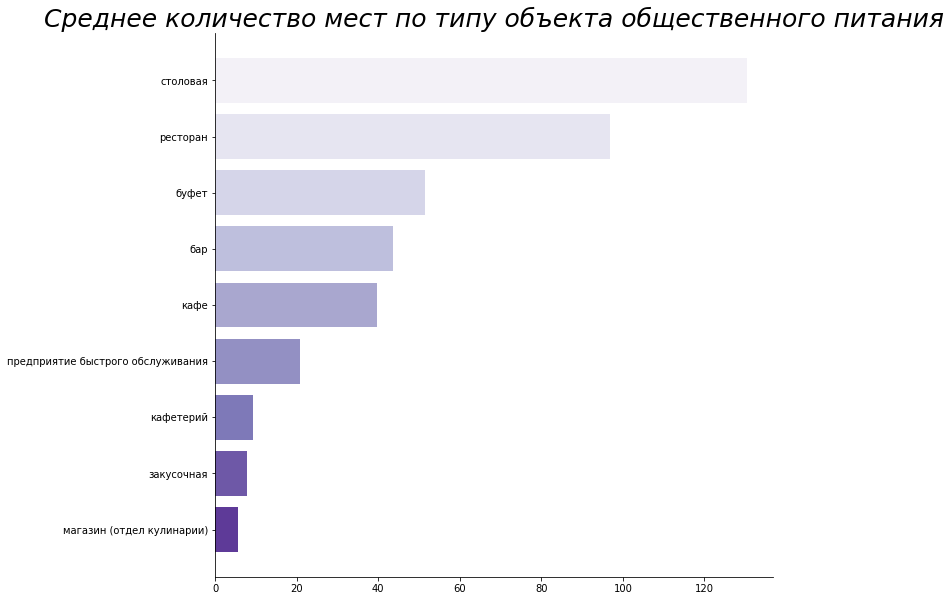

In [ ]:
#построение таблицы средних значений для даньнейшего построения графика
object_type_mean = df.groupby(
    'object_type').agg({'number':['mean', 'median']}).reset_index()
object_type_mean.columns = ['object_type', 'mean', 'median']
object_type_mean = object_type_mean.sort_values('mean',  ascending=False)
object_type_mean

#построение графика
plt.figure(figsize=(10,10))
plt.title('Среднее количество мест по типу объекта общественного питания',
                fontstyle = 'oblique',
                fontsize = 25)
plt.barh(object_type_mean['object_type'], object_type_mean['mean'],color = colors)

sns.despine() 

plt.xticks(wrap=True)
plt.gca().invert_yaxis()
plt.show()

Из графика мы можем наглядно увидеть, что наибольшим средним количеством посадочных мест могут похвастаться **столовые**, за ними следуют **рестораны**. На третьем месте **буфеты**.

### Выделение улицы

Выделим отдельно информацию с улицей на которой расположено заведение.
<br> Для начала посмотрим как расположена информация о улице в общем указании адреса.

In [ ]:
df.head(10)

,id,object_name,chain,object_type,address,number
0,151635,сметана,False,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,False,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,False,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,True,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,False,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50
5,27429,стол. при гоу сош № 1051,False,столовая,"город москва, абрамцевская улица, дом 15, корп...",240
6,148815,брусника,True,кафе,"город москва, переулок сивцев вражек, дом 6/2",10
7,20957,буфет мтуси,False,столовая,"город москва, авиамоторная улица, дом 8, строе...",90
8,20958,кпф семья-1,False,столовая,"город москва, авиамоторная улица, дом 8, строе...",150
9,28858,столовая мтуси,False,столовая,"город москва, авиамоторная улица, дом 8, строе...",120


В связи с тем, что в адресе не всегда обязательно указание улицы, а так же может быть използованы адреса с указанием переулков, площадей, шоссе и т.п. мы с помощью списка наименований и функции выделим все эти наименование в отдельный столбец.

In [ ]:
#создание списка
name_streets =['улица', 'переулок', 'бульвар', 'проспект', 'проезд', 'шоссе', 'аллея', 'набережная', 'квартал', 'линия', 'тупик', 'площадь']

In [ ]:
#создание функции
def get_street(row):
    address = row['address'].split(',') #указываем выделение запятыми
    parts = len(address)  
    try:
        for item in name_streets:
            for i in range(parts):
                if item in address[i]:  
                    return address[i]
    except:
        return street
df['street'] = df.apply(get_street, axis=1)#создание столбца
df['street'] = df['street'].str.strip() #удаление пробелов
df.head(10)

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,False,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,77874,родник,False,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,24309,кафе «академия»,False,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица
3,21894,пиццетория,True,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица
4,119365,кафе «вишневая метель»,False,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица
5,27429,стол. при гоу сош № 1051,False,столовая,"город москва, абрамцевская улица, дом 15, корп...",240,абрамцевская улица
6,148815,брусника,True,кафе,"город москва, переулок сивцев вражек, дом 6/2",10,переулок сивцев вражек
7,20957,буфет мтуси,False,столовая,"город москва, авиамоторная улица, дом 8, строе...",90,авиамоторная улица
8,20958,кпф семья-1,False,столовая,"город москва, авиамоторная улица, дом 8, строе...",150,авиамоторная улица
9,28858,столовая мтуси,False,столовая,"город москва, авиамоторная улица, дом 8, строе...",120,авиамоторная улица


Проверим есть ли значения `None` в новом столбце:

In [ ]:
df[df['street'].isna()]

,id,object_name,chain,object_type,address,number,street
1405,20199,это,False,кафе,"город москва, город зеленоград, корпус 401",35,None
1406,68113,френдс,False,кафе,"город москва, город зеленоград, корпус 435",34,None
1407,20105,кафе «граф монте-кристо»,False,кафе,"город москва, город зеленоград, корпус 436",40,None
1408,22982,альфорно,False,кафе,"город москва, город зеленоград, корпус 438",49,None
1409,151267,альфорно,False,кафе,"город москва, город зеленоград, корпус 438",45,None
...,...,...,...,...,...,...,...
14997,216942,шашлычный дворик,False,кафе,"город москва, поселение десеновское, деревня в...",15,None
14998,216926,кафе «сахли»,False,закусочная,"город москва, поселение десеновское, деревня в...",10,None
15015,208239,газпромнефть,False,кафе,"поселение ""мосрентген"", деревня дудкино, владе...",20,None
15184,220587,пицца паоло,True,кафетерий,"город москва, город зеленоград, корпус 1627",0,None


Значений `None` получилось 381. В основном там указаны заведения, которые находятся в пригородах города Москва.

### Топ-10 улиц по количеству объектов общественного питания

Выделим на каких улицах больше всего заведений общественного питания.

In [ ]:
#расчет количетва объектов на каждую улицу
top_streets = df['street'].value_counts().reset_index()

#переименование столбцов
top_streets.columns = ['street', 'count']

#выделение первых 10
top_10_streets = top_streets.head(10)

top_10_streets

,street,count
0,проспект мира,203
1,профсоюзная улица,182
2,ленинградский проспект,172
3,пресненская набережная,167
4,варшавское шоссе,165
5,ленинский проспект,148
6,проспект вернадского,128
7,кутузовский проспект,114
8,каширское шоссе,111
9,кировоградская улица,108


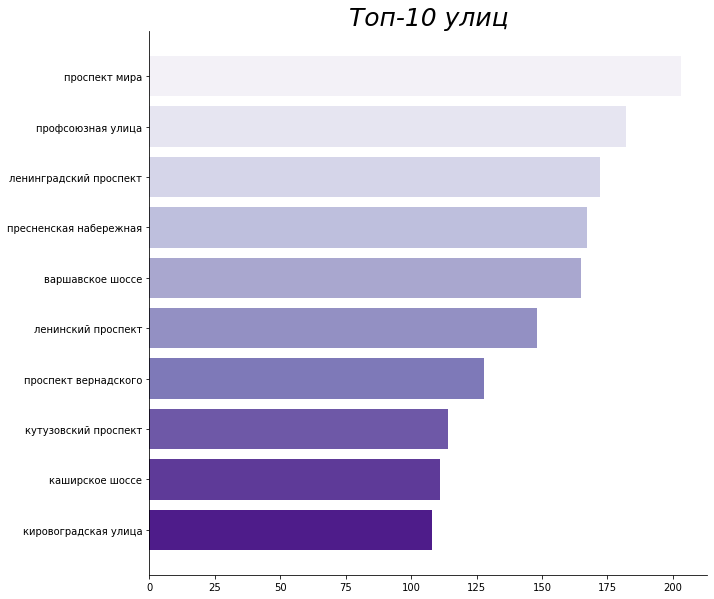

In [ ]:
#построение графика с первыми 10 улицами
plt.figure(figsize=(10,10))
plt.title('Тoп-10 улиц',
                fontstyle = 'oblique',
                fontsize = 25)
plt.barh(top_10_streets['street'], top_10_streets['count'],color = colors)

sns.despine() 

plt.xticks(wrap=True)
plt.gca().invert_yaxis()
plt.show()

На первом месте у нас распологается **Проспект Мира** -203 заведения, на втором месте **профсоюзная улица** с 182 заведениями, на третьем **Ленинградский проспект** -172 заведения. Топ-10 закрывает **Кировоградская улица** - 108 заведений общественного питания. 
<br> Необходимо выяснить в каких районах находятся улици с самым большим количество заведений  в городе. Т.к. в исходных данных  унас нет этой информации, мы воспользуемся внешним источником: https://data.mos.ru/opendata/7710881420-obshchestvennoe-pitanie-v-moskve

In [ ]:
#запомним id
spreadsheet_id = '18suBMm2TzgmL0T6BX5K5wh4sHj_qXnmbRqOqhqPznXs'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
#прочитаем файл
df_2 = pd.read_csv(BytesIO(r.content))


#произведем небольшую предобработку таблицы
df_2['Address'] = df_2['Address'].str.replace('ё','е')
df_2['Address'] = df_2['Address'].str.lower()
df_2['District'] = df_2['District'].str.lower()
df_2.columns =  [x.lower().replace(' ', '_') for x in df_2.columns]
#выведем на экран
df_2 

,id,name,global_id,isnetobject,operatingcompany,typeobject,admarea,district,address,publicphone,seatscount,socialprivileges,longitude_wgs84,latitude_wgs84,geodata_center,geoarea
0,Код,Наименование,global_id,Является сетевым,Название управляющей компании,Вид объекта,Административный округ по адресу,район,адрес,Контактный телефон,Число посадочных мест,Показатель социальных льгот,Долгота в WGS-84,Широта в WGS-84,geodata_center,geoarea
1,00151635,СМЕТАНА,637376221,нет,NaN,кафе,Северо-Восточный административный округ,ярославский район,"город москва, улица егора абакумова, дом 9",PublicPhone:(499) 183-14-10\n\n,48,нет,37.7145650004360390,55.8790015313033730,NaN,NaN
2,000077874,Родник,637376331,нет,NaN,кафе,Центральный административный округ,таганский район,"город москва, улица талалихина, дом 2/1, корпус 1",PublicPhone:(495) 676-55-35\n\n,35,нет,37.6733061300344000,55.7382386551547000,NaN,NaN
3,000024309,Кафе «Академия»,637376349,нет,NaN,ресторан,Центральный административный округ,таганский район,"российская федерация, город москва, внутригоро...",PublicPhone:(495) 662-30-10\n\n,95,нет,37.6696475969381000,55.7355114718314000,NaN,NaN
4,000027429,ГБОУ «Школа № 1430 имени Героя Социалистическо...,637376480,нет,NaN,столовая,Северо-Восточный административный округ,район лианозово,"город москва, угличская улица, дом 17",PublicPhone:(499) 908-06-15\n\n,240,нет,37.5669400000000020,55.9040188006692200,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19552,00363535,Домино'с Пицца,2381690180,да,Домино'с Пицца,кафе,Юго-Западный административный округ,район тёплый стан,"российская федерация, город москва, внутригоро...",NaN,17,нет,37.5111530000000070,55.6363787228666450,"{""coordinates"":[37.511153,55.6363787228666],""t...",NaN
19553,00363333,Coffeeshop Company,2381690187,да,Coffeeshop Company,кафе,Центральный административный округ,красносельский район,"город москва, мясницкая улица, дом 11",NaN,42,нет,37.6326579999999990,55.7617077590700060,"{""coordinates"":[37.632658,55.76170775907],""typ...",NaN
19554,00363641,Хлебница пекарня,2381690199,да,Хлебница пекарня,кафетерий,Юго-Западный административный округ,район тёплый стан,"российская федерация, город москва, внутригоро...",NaN,6,нет,37.5151020000000060,55.6303137211249140,"{""coordinates"":[37.515102,55.6303137211249],""t...",NaN
19555,00363805,Милти,2381690282,да,Милти,предприятие быстрого обслуживания,Северо-Восточный административный округ,район марьина роща,"российская федерация, город москва, внутригоро...",NaN,1,нет,37.6025440000000230,55.7922847679640980,"{""coordinates"":[37.602544,55.7922847679641],""t...",NaN


Как и раньше выделим название улицы в отдельный столбец с помощью функции

In [ ]:
#вызов функции
df_2['street'] = df_2.apply(get_street, axis=1)

#удаление пробелов
df_2['street'] = df_2['street'].str.strip() 
df_2.head(10)

,id,name,global_id,isnetobject,operatingcompany,typeobject,admarea,district,address,publicphone,seatscount,socialprivileges,longitude_wgs84,latitude_wgs84,geodata_center,geoarea,street
0,Код,Наименование,global_id,Является сетевым,Название управляющей компании,Вид объекта,Административный округ по адресу,район,адрес,Контактный телефон,Число посадочных мест,Показатель социальных льгот,Долгота в WGS-84,Широта в WGS-84,geodata_center,geoarea,None
1,00151635,СМЕТАНА,637376221,нет,NaN,кафе,Северо-Восточный административный округ,ярославский район,"город москва, улица егора абакумова, дом 9",PublicPhone:(499) 183-14-10\n\n,48,нет,37.7145650004360390,55.8790015313033730,NaN,NaN,улица егора абакумова
2,000077874,Родник,637376331,нет,NaN,кафе,Центральный административный округ,таганский район,"город москва, улица талалихина, дом 2/1, корпус 1",PublicPhone:(495) 676-55-35\n\n,35,нет,37.6733061300344000,55.7382386551547000,NaN,NaN,улица талалихина
3,000024309,Кафе «Академия»,637376349,нет,NaN,ресторан,Центральный административный округ,таганский район,"российская федерация, город москва, внутригоро...",PublicPhone:(495) 662-30-10\n\n,95,нет,37.6696475969381000,55.7355114718314000,NaN,NaN,абельмановская улица
4,000027429,ГБОУ «Школа № 1430 имени Героя Социалистическо...,637376480,нет,NaN,столовая,Северо-Восточный административный округ,район лианозово,"город москва, угличская улица, дом 17",PublicPhone:(499) 908-06-15\n\n,240,нет,37.5669400000000020,55.9040188006692200,NaN,NaN,угличская улица
5,00148815,Брусника,637376481,да,Брусника,кафе,Центральный административный округ,район арбат,"город москва, переулок сивцев вражек, дом 6/2",PublicPhone:(495) 697-04-89\n\n,10,нет,37.5981275484399900,55.7473904905259940,NaN,NaN,переулок сивцев вражек
6,000020957,Буфет МТУСИ,637376500,нет,NaN,столовая,Юго-Восточный административный округ,район лефортово,"город москва, авиамоторная улица, дом 8, строе...",PublicPhone:(495) 673-89-78\n\n,90,нет,37.7154253918980300,55.7551637509706880,NaN,NaN,авиамоторная улица
7,000028858,Столовая МТУСИ,637376536,нет,NaN,столовая,Юго-Восточный административный округ,район лефортово,"город москва, авиамоторная улица, дом 8, строе...",PublicPhone:(495) 273-89-78\n\n,120,нет,37.7154253918980300,55.7551637509706880,NaN,NaN,авиамоторная улица
8,000023394,Кафе Гогиели,637376678,нет,NaN,кафе,Юго-Восточный административный округ,район лефортово,"город москва, авиамоторная улица, дом 49/1",PublicPhone:(495) 361-38-50\n\n,24,нет,37.7199503788590680,55.7492759892765620,NaN,NaN,авиамоторная улица
9,000022579,Алло Пицца,637376719,да,Алло Пицца,кафе,Западный административный округ,район солнцево,"российская федерация, город москва, внутригоро...",PublicPhone:(495) 934-31-00\n\n,32,нет,37.3985310000000060,55.6451027253735970,NaN,NaN,улица авиаторов


Удалим не интересующие нас столбцы из таблицы с новыми данными

In [ ]:
df_2.columns

Index(['id', 'name', 'global_id', 'isnetobject', 'operatingcompany',
       'typeobject', 'admarea', 'district', 'address', 'publicphone',
       'seatscount', 'socialprivileges', 'longitude_wgs84', 'latitude_wgs84',
       'geodata_center', 'geoarea', 'street'],
      dtype='object')

In [ ]:
district = df_2.drop(columns=['id', 'name', 'global_id', 'isnetobject', 'operatingcompany',
       'typeobject', 'address', 'publicphone',
       'seatscount', 'socialprivileges', 'longitude_wgs84', 'latitude_wgs84',
       'geodata_center', 'geoarea'])

district["street"].isna().sum() #просмотр и удаление строк без улиц
district = district[~district.street.isna()]
district

,admarea,district,street
1,Северо-Восточный административный округ,ярославский район,улица егора абакумова
2,Центральный административный округ,таганский район,улица талалихина
3,Центральный административный округ,таганский район,абельмановская улица
4,Северо-Восточный административный округ,район лианозово,угличская улица
5,Центральный административный округ,район арбат,переулок сивцев вражек
...,...,...,...
19552,Юго-Западный административный округ,район тёплый стан,улица островитянова
19553,Центральный административный округ,красносельский район,мясницкая улица
19554,Юго-Западный административный округ,район тёплый стан,профсоюзная улица
19555,Северо-Восточный административный округ,район марьина роща,улица сущевский вал


In [ ]:
district.duplicated().sum()

16762

In [ ]:
district = district.drop_duplicates()
district.duplicated().sum()
district

,admarea,district,street
1,Северо-Восточный административный округ,ярославский район,улица егора абакумова
2,Центральный административный округ,таганский район,улица талалихина
3,Центральный административный округ,таганский район,абельмановская улица
4,Северо-Восточный административный округ,район лианозово,угличская улица
5,Центральный административный округ,район арбат,переулок сивцев вражек
...,...,...,...
19306,Восточный административный округ,район богородское,тюменский проезд
19354,Северо-Восточный административный округ,район марфино,улица комдива орлова
19486,Юго-Восточный административный округ,рязанский район,саратовская улица
19503,Западный административный округ,район филёвский парк,заречная улица


Объединим таблицу с Топ - 10  улиц с полученной таблицей из внешних источников.

In [ ]:
top_10_ds = pd.merge(top_10_streets, district, how='left', left_on='street', right_on='street')

#сводная таблица по улице, административному округу и району
top_10_ds = pd.pivot_table(top_10_ds, index=['street','admarea', 'district']).sort_values(by='count', ascending=False)
del top_10_ds['count']

top_10_ds

Empty DataFrame
Columns: []
Index: [(проспект мира, Северо-Восточный административный округ, район свиблово), (проспект мира, Северо-Восточный административный округ, алексеевский район), (проспект мира, Северо-Восточный административный округ, останкинский район), (проспект мира, Северо-Восточный административный округ, район ростокино), (проспект мира, Центральный административный округ, мещанский район), (профсоюзная улица, Юго-Западный административный округ, академический район), (профсоюзная улица, Юго-Западный административный округ, район ясенево), (профсоюзная улица, Юго-Западный административный округ, обручевский район), (профсоюзная улица, Юго-Западный административный округ, район коньково), (профсоюзная улица, Юго-Западный административный округ, район тёплый стан), (профсоюзная улица, Юго-Западный административный округ, район черёмушки), (ленинградский проспект, Северный административный округ, район аэропорт), (ленинградский проспект, Северный административный округ, хорошёвский район), (ленинградский проспект, Северный административный округ, район сокол), (ленинградский проспект, Северный административный округ, район беговой), (пресненская набережная, Центральный административный округ, пресненский район), (варшавское шоссе, Центральный административный округ, район якиманка), (варшавское шоссе, Новомосковский административный округ, поселение щербинка), (варшавское шоссе, Юго-Западный административный округ, район южное бутово), (варшавское шоссе, Южный административный округ, донской район), (варшавское шоссе, Южный административный округ, нагорный район), (варшавское шоссе, Южный административный округ, район нагатино-садовники), (варшавское шоссе, Южный административный округ, район чертаново южное), (варшавское шоссе, Южный административный округ, район чертаново северное), (варшавское шоссе, Южный административный округ, район чертаново центральное), (ленинский проспект, Западный административный округ, район тропарёво-никулино), (ленинский проспект, Юго-Западный административный округ, обручевский район), (ленинский проспект, Южный административный округ, донской район), (ленинский проспект, Юго-Западный административный округ, район тёплый стан), (ленинский проспект, Юго-Западный административный округ, гагаринский район), (ленинский проспект, Юго-Западный административный округ, ломоносовский район), (ленинский проспект, Центральный административный округ, район якиманка), (ленинский проспект, Западный административный округ, район проспект вернадского), (проспект вернадского, Троицкий административный округ, поселение вороновское), (проспект вернадского, Юго-Западный административный округ, ломоносовский район), (проспект вернадского, Юго-Западный административный округ, гагаринский район), (проспект вернадского, Западный административный округ, район раменки), (проспект вернадского, Западный административный округ, район тропарёво-никулино), (проспект вернадского, Западный административный округ, район проспект вернадского), (кутузовский проспект, Троицкий административный округ, поселение краснопахорское), (кутузовский проспект, Западный административный округ, район дорогомилово), (кутузовский проспект, Западный административный округ, район фили-давыдково), (каширское шоссе, Южный административный округ, район орехово-борисово северное), (каширское шоссе, Южный административный округ, район нагатино-садовники), (каширское шоссе, Южный административный округ, район москворечье-сабурово), (каширское шоссе, Южный административный округ, район орехово-борисово южное), (каширское шоссе, Южный административный округ, район чертаново южное), (кировоградская улица, Южный административный округ, район чертаново северное), (кировоградская улица, Южный административный округ, район чертаново центральное), (кировоградская улица, Южный административный округ, район чертаново южное)]

In [ ]:
#создание таблицы с подсчетом количества встречаемый административных округов в ТОП- 10 популярных улиц
temporarily = top_10_ds.reset_index()
admarea = temporarily.groupby(
    'admarea').agg({'admarea':['count']}).reset_index()
admarea.columns = ['admarea', 'count']
admarea = admarea.sort_values(by='count', ascending=False)
admarea

,admarea,count
7,Южный административный округ,15
6,Юго-Западный административный округ,13
0,Западный административный округ,7
2,Северный административный округ,4
3,Северо-Восточный административный округ,4
5,Центральный административный округ,4
4,Троицкий административный округ,2
1,Новомосковский административный округ,1


Чаще всего вствечается  **Южный административнй округ**, на втором месте **Юго-Западный административный округ**, а на третьем **Западный административный округ**.

In [ ]:
#создание таблицы с подсчетом количества встречаемый регионов в ТОП- 10 популярных улиц
district_l = temporarily.groupby(
    'district').agg({'district':['count']}).reset_index()
district_l.columns = ['district', 'count']
district_l = district_l.sort_values(by='count', ascending=False)
district_l

,district,count
31,район чертаново южное,3
7,обручевский район,2
26,район тропарёво-никулино,2
27,район тёплый стан,2
29,район чертаново северное,2
30,район чертаново центральное,2
21,район проспект вернадского,2
18,район нагатино-садовники,2
34,район якиманка,2
4,ломоносовский район,2


Районов у нас получилось 37. Чаще всего встречется **район  Чертаново Южное**, это название встречается три раза. Все остальные районы встречаются 1-2 раза.

### Найдите число улиц с одним объектом общественного питания.

Рассмотрим улицы с одним заведением общественного питания.

In [ ]:
#фильтруем улицы встречающиеся только один раз
one = top_streets[top_streets['count'] == 1]
one

,street,count
1354,будайская улица,1
1355,улица новая дорога,1
1356,переулок хользунова,1
1357,нижний таганский тупик,1
1358,улица евгения родионова,1
...,...,...
1898,попов проезд,1
1899,улица кошкина,1
1900,улица фадеева,1
1901,малый конюшковский переулок,1


Таких улиц оказалось 549.
<br> Найдем в каких районах и административных округах чаще всего встречаются такие улицы.

In [ ]:
#объединение таблиц
one_rest_ds = pd.merge(one, district, how='left', left_on='street', right_on='street')

#создание сводной таблицы
one_rest_ds = pd.pivot_table(one_rest_ds, index=['street','admarea', 'district']).sort_values(by='count', ascending=False)
del one_rest_ds['count']
one_rest_ds.head(80)

,,
street,admarea,district
1-й балтийский переулок,Северный административный округ,район аэропорт
солнечногорский проезд,Северный административный округ,головинский район
старомонетный переулок,Центральный административный округ,район якиманка
старомарьинское шоссе,Северо-Восточный административный округ,район марьина роща
староалексеевская улица,Северо-Восточный административный округ,алексеевский район
...,...,...
новоостаповская улица,Юго-Восточный административный округ,южнопортовый район
нововладыкинский проезд,Северо-Восточный административный округ,район отрадное
новобутовский проезд,Юго-Западный административный округ,район южное бутово


Как и ранее посмотрим как часто встречается каждый административный округ.

In [ ]:
temporarily_2 = one_rest_ds.reset_index()
admarea_one = temporarily_2.groupby(
    'admarea').agg({'admarea':['count']}).reset_index()
admarea_one.columns = ['admarea', 'count']
admarea_one = admarea_one.sort_values(by='count', ascending=False)
admarea_one

,admarea,count
8,Центральный административный округ,145
5,Северо-Восточный административный округ,49
0,Восточный административный округ,47
4,Северный административный округ,42
1,Западный административный округ,36
9,Юго-Восточный административный округ,32
6,Северо-Западный административный округ,23
10,Юго-Западный административный округ,23
11,Южный административный округ,18
3,Новомосковский административный округ,10


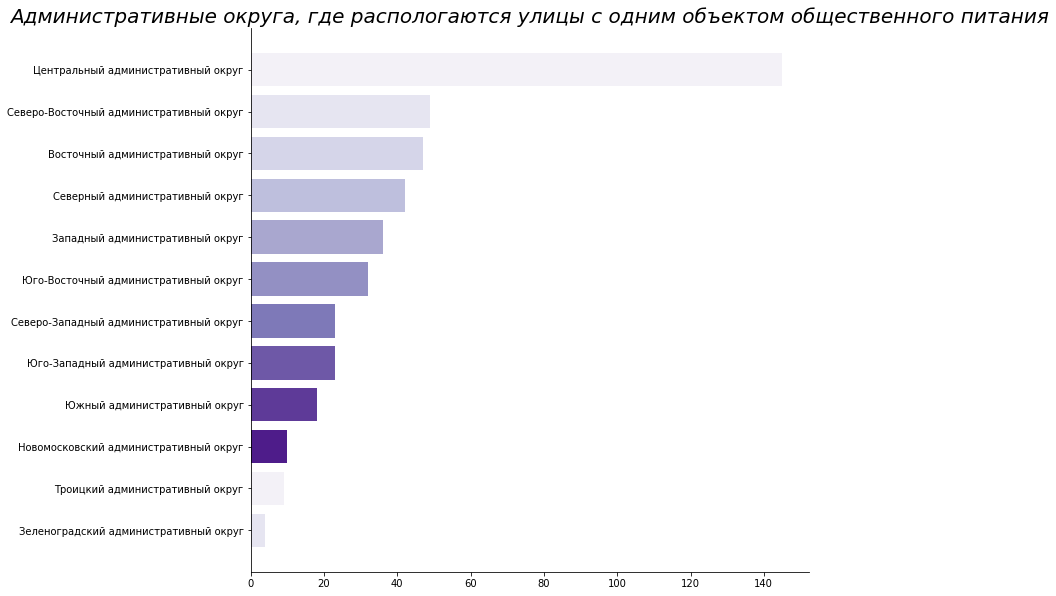

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Административные округа, где распологаются улицы с одним объектом общественного питания',
                fontstyle = 'oblique',
                fontsize = 20)
plt.barh(admarea_one['admarea'], admarea_one['count'],color = colors)

sns.despine() 

plt.xticks(wrap=True)
plt.gca().invert_yaxis()
plt.show()

Больше всего улиц только с одним заведением встречается в **Центральном административном округе**, на втором месте **Северо-Восточный**,  а на третьем **Восточный административный округ**.
<br>На графике наглядно видно, что у  **Центрального административного округа** очень большой отрыв, а вот между вторым и третьим местом он совсем маленький.
<br>Рассмотрим таким же образом районы города Москвы.

In [ ]:
district_one = temporarily_2.groupby(
    'district').agg({'district':['count']}).reset_index()
district_one.columns = ['district', 'count']
district_one = district_one.sort_values(by='count', ascending=False)
district_one.head(50)

,district,count
87,район хамовники,22
100,таганский район,22
3,басманный район,20
29,пресненский район,18
101,тверской район,17
79,район соколиная гора,12
30,район арбат,11
11,красносельский район,10
41,район замоскворечье,9
94,район южное бутово,9


Их получилось 106. Сократим список до 10 самых популярных.

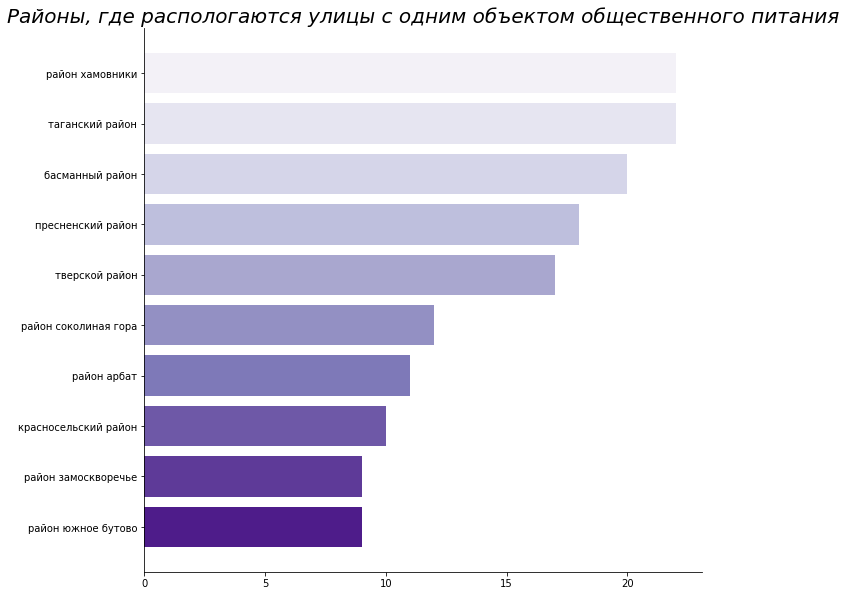

In [ ]:
district_10_one = district_one.head(10)


plt.figure(figsize=(10,10))
plt.title('Районы, где распологаются улицы с одним объектом общественного питания',
                fontstyle = 'oblique',
                fontsize = 20)
plt.barh(district_10_one['district'], district_10_one['count'],color = colors)

sns.despine() 

plt.xticks(wrap=True)
plt.gca().invert_yaxis()
plt.show()

Чаще остальных на улицах **района Хамовники** и **Таганского района** встречаются улицы только с одним заведением общественного питания, Обра районов делят *первое* место. На *втором* месте **Басманный район**, а на *третьем* **Пресненский**.

## Вывод и рекомендации

**Вывод**:
<br>Анализ рынока заведений общественного питания Москвы показал, что почти *40%* заведений занимают *кафе*. Следующие по популярности *столовые* и *рестораны*.
<br>
<br> Из всех заведений общественного питания только около *20%* являются *сетевыми*. Чаще всего *сетевые* это *предприятия быстрого обслуживания*, далее идут *Магазины* и *рестораны*.
<br>
<br>Наибольшее число *сетевых* заведений имеют количество посадочных мест до 40.
<br>
<br>Улицами, на которых встречается больше всего заведений являюся *Проспект мира*, *Профсоюзная улица*	и *Ленинградский проспект*.
<br>
<br>Улиц, на которых распологается только одно заведение общественного питания - 549. Больше всего таких улиц расположилось в *Центральном административном округе* . Районами, в которых больше всего улиц с одиним заведением, являются *Хамовники*, *Таганский* и *Басманный*.  
  

**Рекомендации**:  
Идея для открытия кафе  у нас довольно креативная, но требует много финансовых вложений. К сожалению, у нас не было информации по проходимости и финансовом статусе заведений, но мы можем более чем достоверно предположить, что самая большая проходимость в центре города, т.е. в *Центральном административном округе* или близлежащих районах. Например, в *Тверском* районе есть улицы всего с одним заведением, такие как *Никитский переулок*. Там достаточно и местных жителей и туристов. 
<br> 
<br>Для начала стоит открывать кафе на небольшое количество посадочных мест (до 20). Это поможет нам изначально потратить меньше на аренду, персонал, технику и наших особенных официантов.
<br>
<br>О сетевом характере работы говорить еще рано, стоит проверить работу одного кафе.

[**Презентация**](https://disk.yandex.ru/i/3-xU___WQdgbuA)